## Gini Index

The Gini Index is an error metric used while evaluating how splits should be made in a classification tree. This is defined as follows. If we wish to split a given region $R$ into two regions based on a predictor $X_j$ and a threshold value $s$ of that predictor, we would consider the regions $R_1 = \{X \vert X_j \leq s\}$ and $R_2 = \{X \vert X_j > s \}$, where $X = (X_1, \ldots, X_p)^T$. This split would be considered "good" if each of them contained training observations from predominantly one class. This goodness criterion is captured by the Gini index. For region $R_1$, the index is
$$
    \text{GI} = \sum_{k = 1}^{K} p_{1, k} (1 - p_{1, k}),
$$
where $K$ is the total number of classes and $p_{1, k}$ is the proportion of training observations in regsion $R_1$ from class $k$. The Gini index is small if one of the $p_{1, k} \approx 1$ while the others are $\approx 0$, which is precisely what we want.

## Cross-Entropy

The other alternative to the Gini index is to use cross-entropy, defined by:
$$
    D = - \sum_{k = 1}^{K} p_{1, k} \log p_{1, k}.
$$
This value is close to $0$ when one of the $p_{1, k} \approx 1$ while the others are close to $0$. Otherwise, the sum will be closer to $1$ as the following diagram depicts for the situation with just two classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

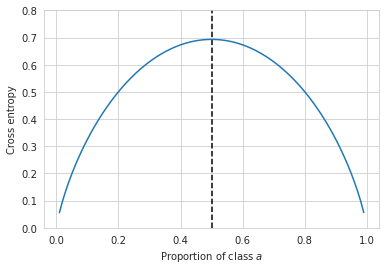

In [2]:
# Assume that there are two classes a and b. 
p_a = np.linspace(0.01, 0.99, num=100)
p_b = 1 - p_a

cross_entropy = [-x_a * np.log(x_a) -x_b * np.log(x_b) for x_a, x_b in zip(p_a, p_b)]

plt.xlabel(r'Proportion of class $a$')
plt.ylabel('Cross entropy')

plt.plot(p_a, cross_entropy)

plt.ylim(0, 0.8)
plt.vlines(x=0.5, ymin=-0.0, ymax=0.8, linestyle='--', color='k')

plt.show()

In [3]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    dot_data = StringIO()
    export_graphviz(estimator, 
                    out_file=dot_data, 
                    feature_names=features, 
                    class_names=class_names, 
                    filled=filled)
    
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    
    return graph 

In [4]:
HEART_DATA = '../datasets/Heart.csv'
df = pd.read_csv(HEART_DATA)

df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.isna().any()

Unnamed: 0    False
Age           False
Sex           False
ChestPain     False
RestBP        False
Chol          False
Fbs           False
RestECG       False
MaxHR         False
ExAng         False
Oldpeak       False
Slope         False
Ca             True
Thal           True
AHD           False
dtype: bool

In [6]:
df = df.dropna()
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


## Factorize Categorical Variables

In [7]:
CATEGORICAL = ['ChestPain', 'Thal', 'AHD']

# pd.factorize returns the code, uniques (the unique values of the categorical variable)
for cat in CATEGORICAL:
    df[cat] = pd.factorize(df[cat])[0]

In [8]:
df['AHD'].head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [9]:
import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [10]:
X = df.drop('AHD', axis=1)
y = df['AHD']

clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, max_features=5, min_impurity_decrease=0.001)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=6, max_features=5, max_leaf_nodes=20,
                       min_impurity_decrease=0.001)

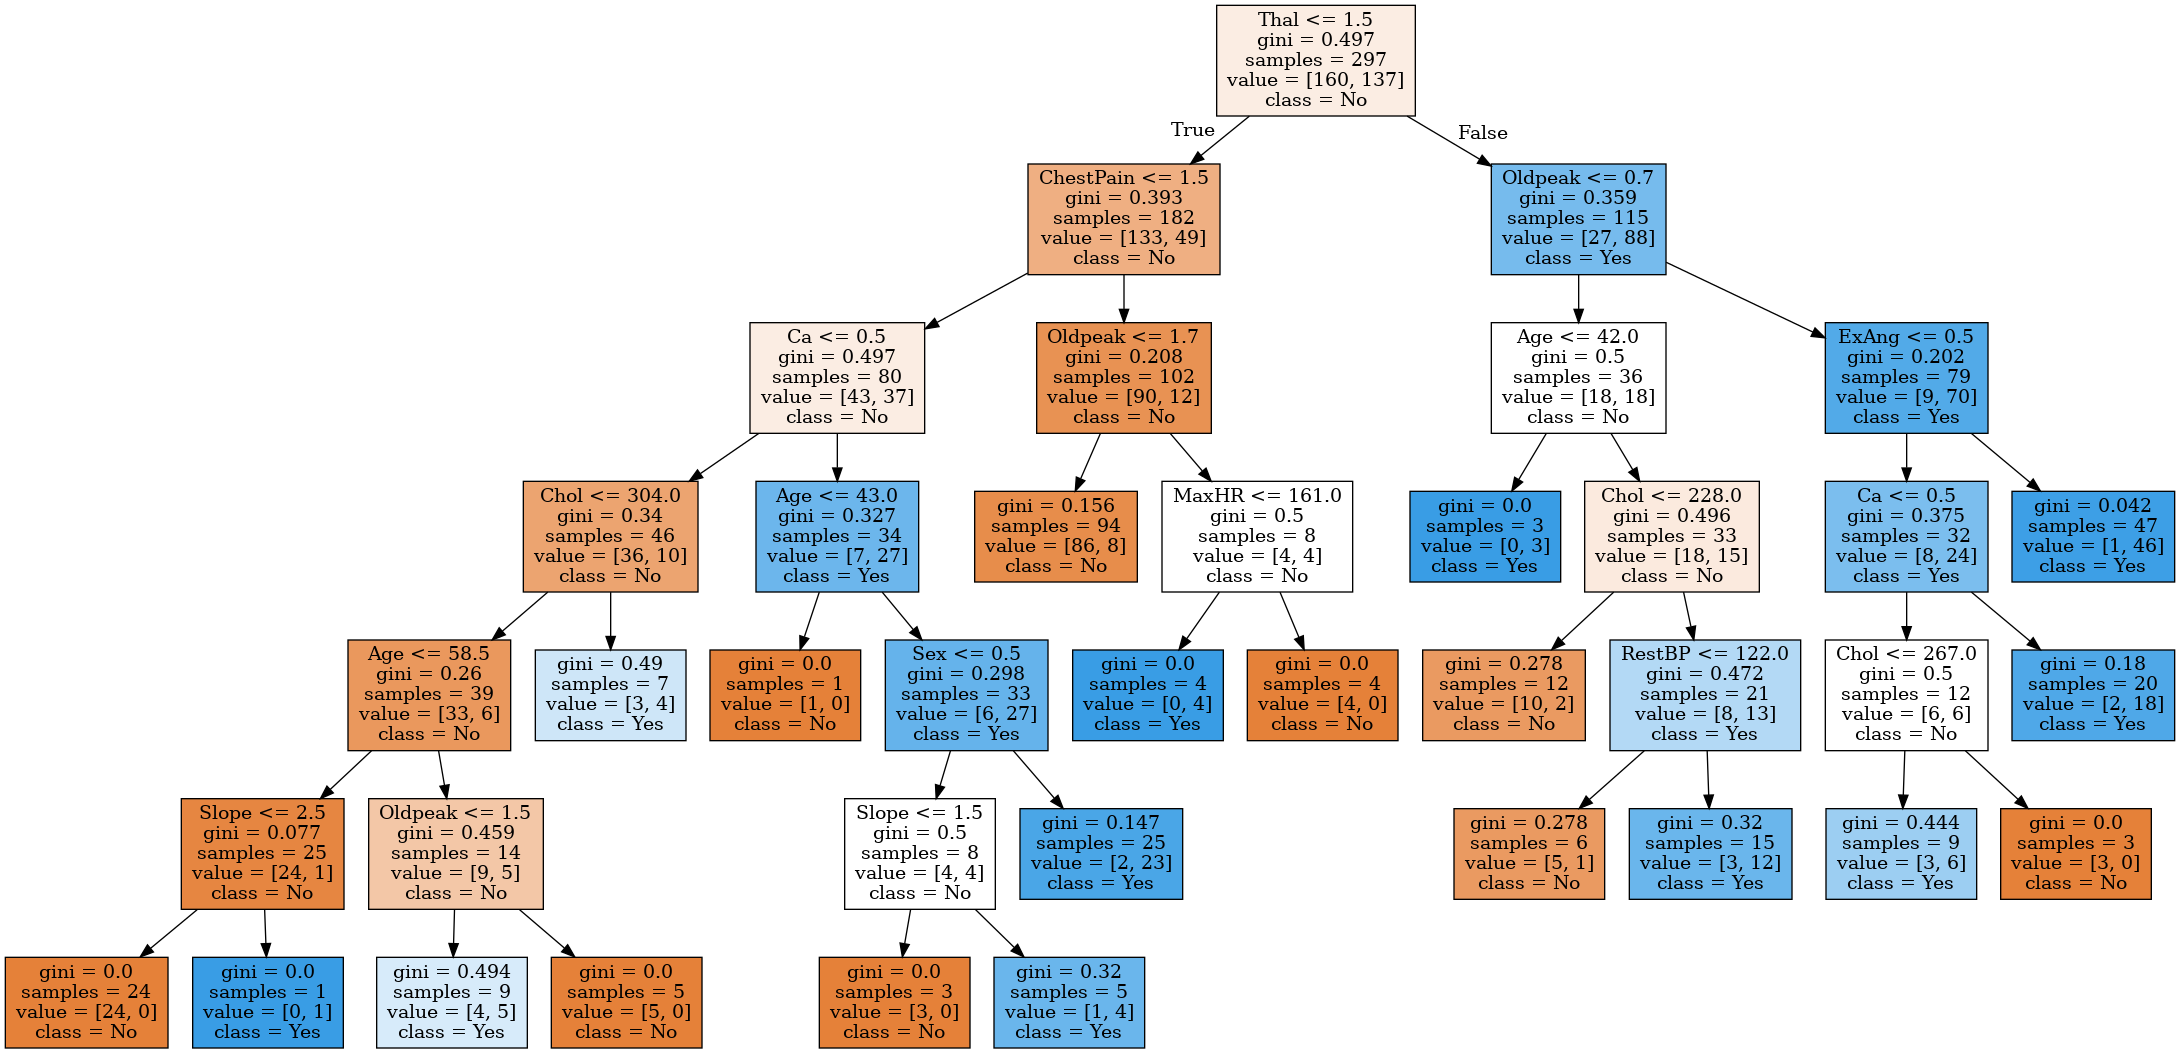

In [11]:
graph = print_tree(clf, X.columns, class_names=['No', 'Yes'])

Image(graph[0].create_png())